##  Our first interactive Streamlit App

In the following exercise, we will use the exercise from the previous lecture about visualisation and build interactive Streamlit App.

We will use the most basic commands that are enough to do a job well. For more, you can use [Streamlit's documentation](https://docs.streamlit.io/develop/api-reference) and/or it's [Gallery](https://streamlit.io/gallery) that also provides code. 

### Importing packages

In [1]:
import pandas as pd

# in some cases ipynb needs the line bellow in order to correctly show the plots
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme and activate color codes
sns.set_theme()
sns.set(color_codes=True)


### Read in dataset

In [2]:
# load a dataset
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Display a few plots from the previous exercise

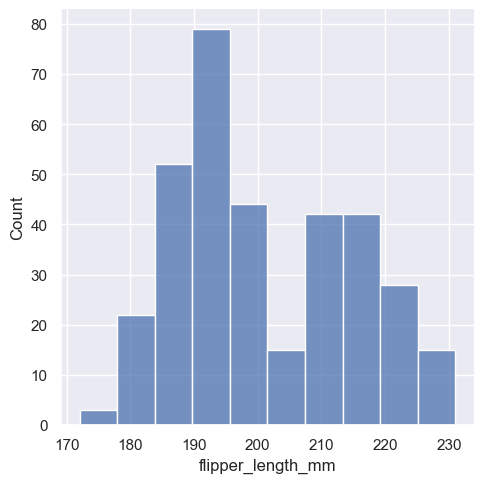

In [3]:
sns.displot(data=penguins,
            x="flipper_length_mm")

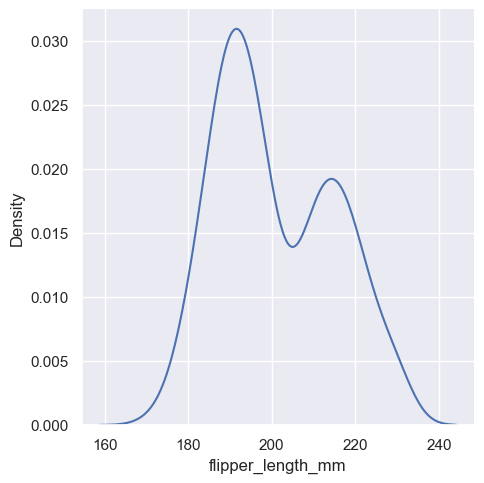

In [4]:
sns.displot(data=penguins,
            x="flipper_length_mm",
            kind="kde")

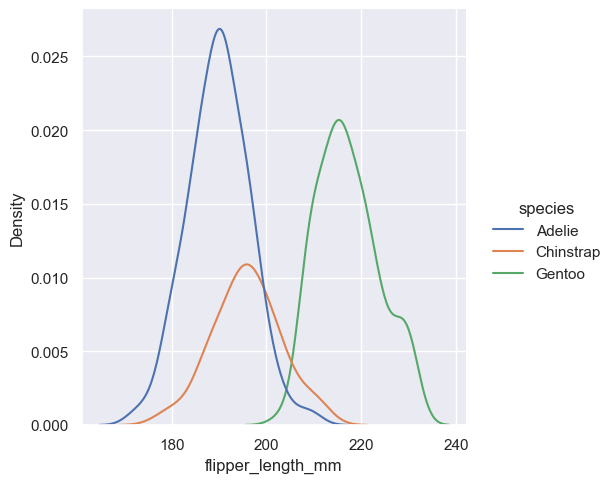

In [5]:
sns.displot(data=penguins,
            x="flipper_length_mm",
            kind="kde",
            hue="species")

## Let's build the app

We will use **'%%writefile app.py'** and **'%%writefile -a app.py'** commands (also available in Colab) to generate new file called 'app.py' and when used with flag '-a' to append text to the existing file. In this way we can have exercise in iPython notebook advancing step by step and in the same time creating .py file. 

In the first part of the **'app.py'** we need to import all the packages that the app is using. In addition, we can also set the basic parameters as it is theme in our example. 

In [6]:
%%writefile app.py

import streamlit as st
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme and activate color codes
sns.set_theme()
sns.set(color_codes=True)



Overwriting app.py


In the next step we read in dataset. In our example we have rather small dataset, thus there should be no problem with performance. There are several ways to tackle inefficiency when having bigger databases, but more about it tomorrow!

In [7]:
%%writefile  -a app.py

################### import dataset
penguins = sns.load_dataset("penguins")


Appending to app.py


OKAY... Let the fun begins.... First, we will create title and subtitle...

In [8]:
%%writefile  -a app.py

########### set the title and subtitle
st.title("Differences between penguins")

st.subheader("My flipper is longer!!!")

Appending to app.py


Now our app should alrady show something, so, we can go to terminal and run **'streamlit run app.py'** which will give open app in the new window. Obviously, it will only show title and subtitle.

We can add images to the streamlit app. In our example, we read them from internet source. We could also read them from local drive. We use **'st.image'** to do that. 

In [9]:
%%writefile  -a app.py

########## we add image
st.image("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/man/figures/lter_penguins.png")

Appending to app.py


In [ ]:
%%writefile  -a app.py

############## we create filters for our interactive plot
with st.sidebar:
    st.subheader("Filters")

    all_species = sorted(penguins["species"].dropna().unique().tolist())
    selected_species = st.multiselect(
        "Species to show",
        options=all_species,
        default=all_species,
    )

    feature_options = {
        "Flipper length (mm)": "flipper_length_mm",
        "Bill length (mm)": "bill_length_mm",
        "Bill depth (mm)": "bill_depth_mm",
        "Body mass (g)": "body_mass_g",
    }
    feature_label = st.selectbox("Feature (x-axis)", list(feature_options.keys()))
    x_col = feature_options[feature_label]

    # KDE options
    fill = st.checkbox("Shade area", value=True)
    bw_adjust = st.slider("Smoothing (bw_adjust)", 0.2, 2.0, 1.0, 0.1)
    common_norm = st.checkbox("Normalize across species", value=False)


In [ ]:
%%writefile  -a app.py

if not selected_species:
    st.info("Select at least one species to display the plot.")
else:
    data = penguins[penguins["species"].isin(selected_species)].dropna(subset=[x_col])

    g = sns.displot(
        data=data,
        x=x_col,
        kind="kde",
        hue="species",
        fill=fill,
        bw_adjust=bw_adjust,
        common_norm=common_norm,
        height=4,
        aspect=1.6,
    )
    fig = g.fig if hasattr(g, "fig") else g.figure
    st.pyplot(fig)
    plt.close(fig)

In [ ]:
%%writefile  -a app.py

########  add button to save image
from io import BytesIO

buf = BytesIO()
fig.savefig(buf, format="png", dpi=200, bbox_inches="tight") 
buf.seek(0)
st.download_button(
    "Save image",
    data=buf,
    file_name=f"penguins_{x_col}.png",
    mime="image/png",
)

In [ ]:
%%writefile  -a app.py

########### Footer
st.caption("Developed for SDS M1 course.")